Central questions: can classifiers be trained using neuroimaging meta-analysis data (i.e., coordinates, modeled activation maps, etc.). 
Goals: [1] train classifier using coordinates/modeled activation maps, [2]...

In [1]:
# Import libraries and packages.
import pandas as pd
import numpy as np
import sklearn as skl
import glob
import datetime; today = datetime.date.today()
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma.kernel import ALEKernel

In [2]:
# Select directories and files structure.
input_prefix = str(today)
output_prefix = str(today)
in_dir = 'constructs'
out_dir = 'out'
# paths = glob.glob("constructs/*.txt")
paths=['constructs/saccades.txt',
      'constructs/tmind.txt',
      'constructs/pain.txt',
      'constructs/counting.txt']
print('constructs to model = {0}'.format(len(paths)))

constructs to model = 4


In [3]:
# Convert coordinates to nimare dataset. DOES NOT WORK!
datas = {}
for path in paths:
    print(path)
    datas[path[len(in_dir) + 1:-4]] = convert_sleuth_to_dataset(path)

datas.keys()  # Confirm construct keys.

constructs/saccades.txt
constructs/tmind.txt
constructs/pain.txt
constructs/counting.txt


dict_keys(['saccades', 'tmind', 'pain', 'counting'])

In [4]:
print('MA maps making...\t\t@{0}'.format(str(datetime.datetime.now())))
ma_maps_arrs = {}
for data in datas.keys():
    kern = ALEKernel()
    ma_maps = kern.transform(datas[data])  # Compute MA maps (len = ???)
    ma_maps_arrs[data] = []
    for i in np.arange(0, len(ma_maps)):
        ma_maps_arrs[data].append(np.ravel(ma_maps[i].get_data(), order='C'))
    labels = pd.DataFrame(index=datas[data].ids)
print('MA maps done!\t\t\t@{0}'.format(str(datetime.datetime.now())))

MA maps making...		@2019-08-07 17:47:36.194973
MA maps done!			@2019-08-07 17:47:46.755347


In [5]:
keys = list(datas.keys())
dataframes = {}
key = {}
for i in np.arange(0, len(keys)):
    key[keys[i]] = i
    arr = np.asarray(ma_maps_arrs[keys[i]])
    dataframes[i] = pd.DataFrame(arr)
    dataframes[i]['y'] = i

In [6]:
all_data = pd.concat([dataframes[0], dataframes[1]], ignore_index=True)

for i in np.arange(2, len(dataframes.keys())):
    all_data = pd.concat([all_data, dataframes[i]], ignore_index=True)


In [7]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,902620,902621,902622,902623,902624,902625,902626,902627,902628,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
unique_classes = np.unique(all_data['y'])

In [9]:
unique_classes

array([0, 1, 2, 3])

In [10]:
test_classes = unique_classes
test_classes

array([0, 1, 2, 3])

In [11]:
data_test_classes = all_data.loc[all_data['y'].isin(test_classes)].reset_index(drop=True)
data_test_classes

,0,1,2,3,4,5,6,7,8,9,...,902620,902621,902622,902623,902624,902625,902626,902627,902628,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
# remove voxels which are zero in all classes
zero_voxels = (data_test_classes != 0).any(axis=0)
sub_sampled_data_test_classes = data_test_classes.loc[:, zero_voxels]
sub_sampled_data_test_classes

,93491,93492,93493,93582,93583,93672,93673,93674,93764,102954,...,798110,798190,798191,798192,798193,798281,798282,798283,798373,y
0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3.621532e-07,0.000001,0.000004,1.757523e-07,6.730194e-07,1.473533e-08,6.937423e-08,2.656591e-07,2.227324e-08,4.015579e-07,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.321810e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
from sklearn import decomposition
import matplotlib.pyplot as plt
pca = decomposition.PCA()
y = sub_sampled_data_test_classes.iloc[:,-1].values
X_raw = sub_sampled_data_test_classes.iloc[:,:-1].values
pca.fit(X_raw)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

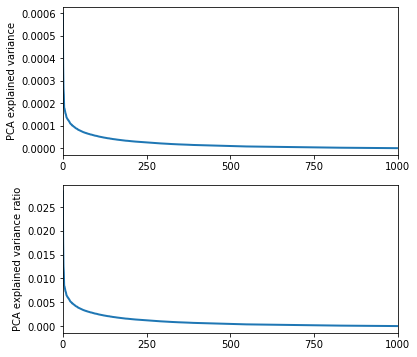

999

In [14]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(6, 6))
ax0.plot(pca.explained_variance_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax0.set_xticks(np.arange(0, 1001, 250))
ax0.set_xlim([0,1000])

ax1.plot(pca.explained_variance_ratio_, linewidth=2)
ax1.set_ylabel('PCA explained variance ratio')
ax1.set_xticks(np.arange(0, 1001, 250))
ax1.set_xlim([0,1000])
plt.show()
pca.n_components_

In [15]:
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
X = pca.transform(X_raw)
X.shape

(999, 999)

In [16]:
clf_svc = svm.LinearSVC(max_iter = 10000, class_weight = 'balanced')
# clf = RidgeClassifier(alpha=100, class_weight = 'balanced')
scores_svc = cross_val_score(clf_svc, X, y, cv=25)
print("Accuracy with Linear SVM classifier: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

Accuracy with Linear SVM classifier: 0.67 (+/- 0.19)


In [17]:
scores_svc

array([0.68292683, 0.56097561, 0.75609756, 0.46341463, 0.6097561 ,
       0.58536585, 0.7804878 , 0.68292683, 0.6097561 , 0.73170732,
       0.53658537, 0.80487805, 0.75609756, 0.7       , 0.675     ,
       0.725     , 0.53846154, 0.71794872, 0.58974359, 0.8974359 ,
       0.71052632, 0.60526316, 0.71052632, 0.57894737, 0.68421053])

In [18]:
clf_ridge = RidgeClassifier(alpha=100, class_weight = 'balanced')
scores_ridge = cross_val_score(clf_ridge, X, y, cv=25)
print("Accuracy with Ridge classifier: %0.2f (+/- %0.2f)" % (scores_ridge.mean(), scores_ridge.std() * 2))

Accuracy with Ridge classifier: 0.61 (+/- 0.18)


In [19]:
scores_ridge

array([0.56097561, 0.58536585, 0.75609756, 0.56097561, 0.56097561,
       0.68292683, 0.6097561 , 0.53658537, 0.56097561, 0.63414634,
       0.56097561, 0.68292683, 0.70731707, 0.525     , 0.675     ,
       0.6       , 0.69230769, 0.53846154, 0.53846154, 0.8974359 ,
       0.65789474, 0.5       , 0.63157895, 0.52631579, 0.57894737])